In [74]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import *
from FRSolver import * 

%matplotlib inline

In [75]:
variances = pd.read_csv('Data/Fig8/Fig8VarianceAnomaly/variances.csv')

exs = np.linspace(0.05,0.15,200)
eys = np.flip(np.linspace(-0.14, -0.19, 100))

In [76]:
variances = np.array(variances)

In [77]:
max_index = np.unravel_index(np.argmax(variances), variances.shape)
print(max_index)
ex = exs[max_index[0]]
ey = eys[max_index[1]]
print(ex, ey)

(145, 68)
0.1228643216080402 -0.15565656565656566


In [78]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

In [79]:
pxhat = p1 + ex
pyhat = p2 + ey

# velocity 
v1hat = np.array([pxhat,pyhat,0], dtype="float64")
v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
v3hat = np.array([pxhat,pyhat,0], dtype="float64") 
v0shat = np.array([v1hat,v2hat,v3hat])

R = findR(v0shat, E0, masses)

# position
r1hat = np.array([-R,0.0,0.0], dtype="float64") 
r2hat = np.array([0,0.0,0.0], dtype="float64")
r3hat = np.array([R,0.0,0.0], dtype="float64")
r0shat = np.array([r1hat,r2hat,r3hat])


rcom, vcom = CentreOfMass(r0shat, v0shat, masses)
v0shat -= vcom
r0shat -= rcom

In [80]:
print(v0shat, r0shat)

[[ 0.46997532  0.37707143  0.        ]
 [-0.93995064 -0.75414287  0.        ]
 [ 0.46997532  0.37707143  0.        ]] [[-1.05204531  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 1.05204531  0.          0.        ]]


In [81]:
C = 0.3
T = 1000

In [82]:
traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses, hlim = 1e-6)
print(stability)

1


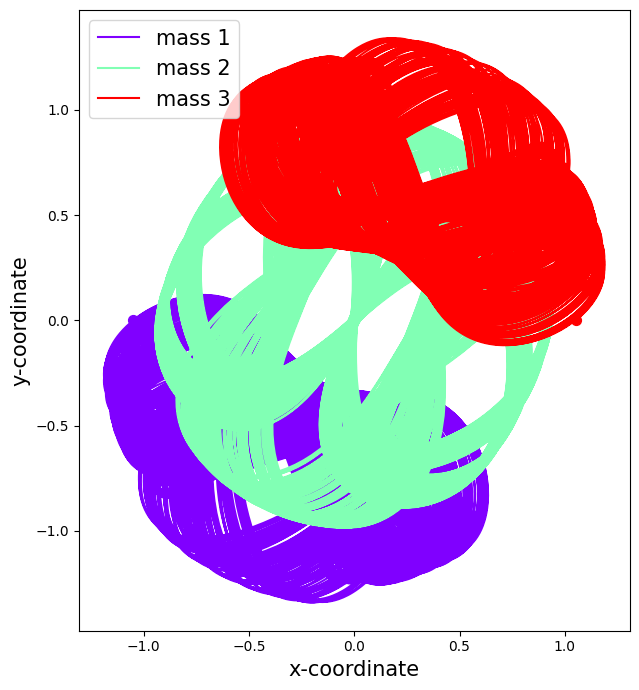

In [83]:
PlotOrbits(traj)

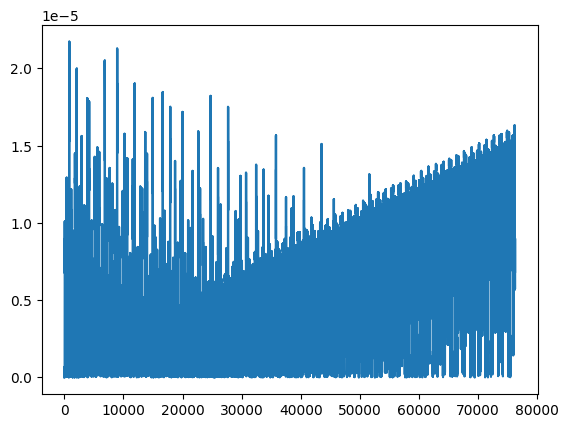

In [84]:
plt.plot(traj[3])

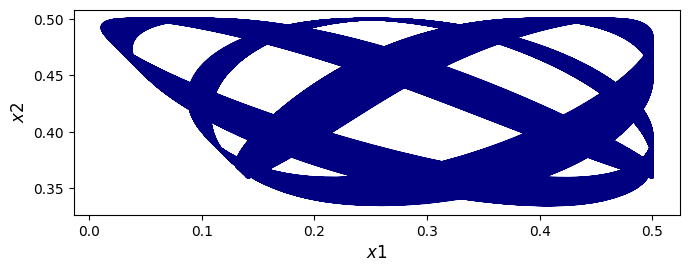

In [85]:
r_traj = traj[1]
path = np.array([distCalculator(rs) for rs in r_traj])
PlotPath(path, figsize = (7,7))

In [86]:
C = 0.3
T = 100

In [87]:
traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses, hlim = 1e-6)
print(stability)

1


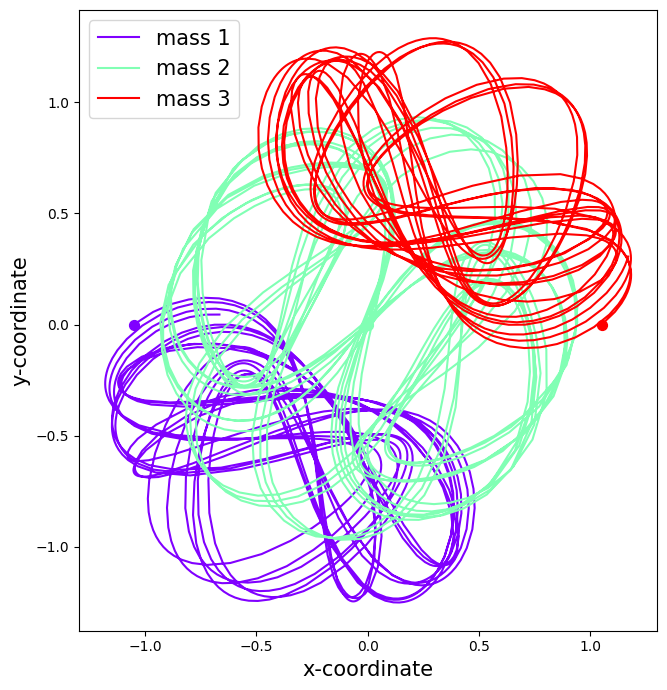

In [88]:
PlotOrbits(traj)
plt.savefig('Plots/3Body/Anomaly/Anomalous 3-body orbit, traj')

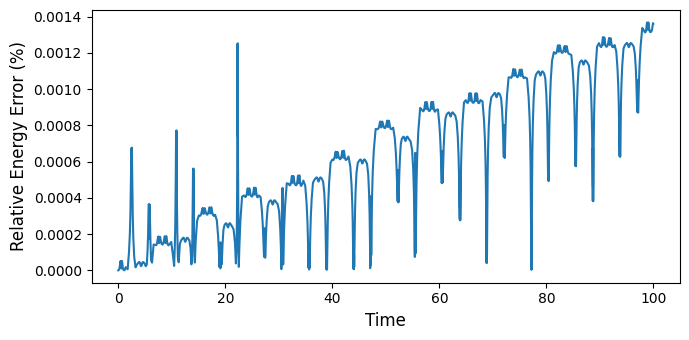

In [89]:
PlotTotalEnergy(traj, figsize = (7, 3.5))
plt.savefig('Plots/3Body/Anomaly/Anomalous 3-body orbit, Energy')

In [90]:
r_traj = traj[1]
path = np.array([distCalculator(rs) for rs in r_traj])

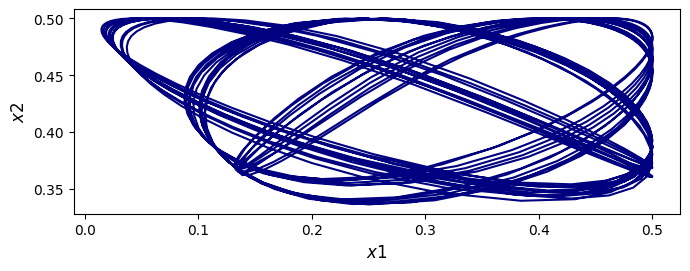

In [92]:
PlotPath(path, figsize = (7,7))
plt.tight_layout()
plt.savefig('Plots/3Body/Anomaly/Anomalous 3-body orbit, tri-plot')

